In [309]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import chardet

In [310]:
# Read the csv file
df = pd.read_csv("Diwali Sales Data.csv", encoding_errors= 'replace')

In [311]:
# check the total rows and columns in our dataset
print(df.shape)

(11251, 13)


 Data Understanding and Exploration

In [312]:
df = pd.read_csv('Diwali Sales Data.csv')
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [313]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Diwali Sales Data.csv')

# Drop rows with non-finite values in the 'Amount' column
df = df.dropna(subset=['Amount'])

# Convert the amount type to integer
df['Amount'] = df['Amount'].astype(int)

# Check the data types
print(df.dtypes)


User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object


In [314]:
# Load the dataset
df = pd.read_csv('Diwali Sales Data.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Explore basic statistics
summary_stats = df.describe()

# Display summary information
print("Missing Values:")
print(missing_values)
print("\nSummary Statistics:")
print(summary_stats)


Missing Values:
User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Summary Statistics:
            User_ID           Age  Marital_Status        Orders        Amount
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as Status and unnamed1). Lets just remove these columns 

remove empty col

In [316]:
import pandas as pd

# Load the CSV file into a DataFrame using 'ISO-8859-1' encoding
filename = "Diwali Sales Data.csv"
try:
    df = pd.read_csv(filename, encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Error: Unable to decode the file using 'ISO-8859-1' encoding.")
    print("Please ensure the file encoding is compatible or provide the correct encoding.")

# Define a function to delete 'Status' and 'Unnamed' columns
def delete_columns(df):
    columns_to_remove = ['Status', 'unnamed1']
    df = df.drop(columns=columns_to_remove, errors='ignore')
    return df

# Call the function to delete columns
df = delete_columns(df)

# Save the updated csv file
df.to_csv(filename, index=False)

print("Columns 'Status' and 'Unnamed' removed. Updated dataset saved successfully.")


Columns 'Status' and 'Unnamed' removed. Updated dataset saved successfully.


# Data Cleaning

In [317]:
import pandas as pd
from unidecode import unidecode

# Read the CSV file
df = pd.read_csv('Diwali Sales Data.csv')

# Clean the 'State' column using unidecode
df['State'] = df['State'].apply(unidecode).str.replace('AndhraAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA Pradesh', 'Andhra Pradesh')

# Save the cleaned data back to the CSV file
df.to_csv('Diwali Sales Data.csv', index=False)


print("Data cleaned and saved successfully")
print(df.head(5))

Data cleaned and saved successfully
   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western       Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central       Automobile             Auto       3  23924.0  
3       Karnataka  Southern     Construction             Auto       2  23912.0  
4         Gujarat   Western  Food Processing             Auto       2  23877.0  


In [336]:
# Search for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [338]:
# Remove null values
df.dropna(inplace=True)
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### EDA

In [335]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11251,11251,11251,11251,11251,11251,11251,11251
unique,1250,2351,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7842,4543,1946,4296,1588,2655


count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64


C:\Users\chirag.a.tiwari\AppData\Local\Temp\ipykernel_8596\3870800612.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




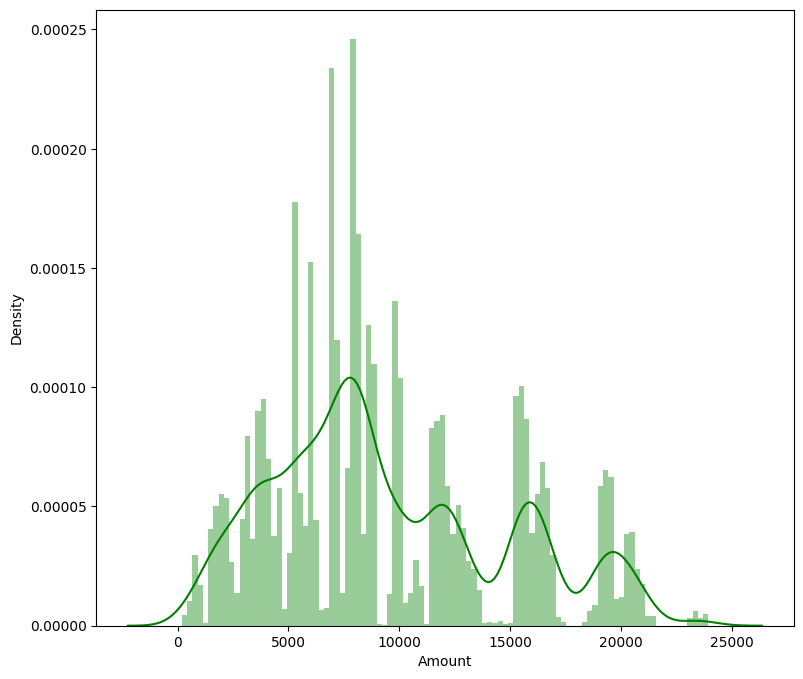

In [334]:
print(df['Amount'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Amount'], color='g', bins=100, hist_kws={'alpha': 0.4});

With this information we can see that the prices are skewed right and some outliers lies above ~20,000.

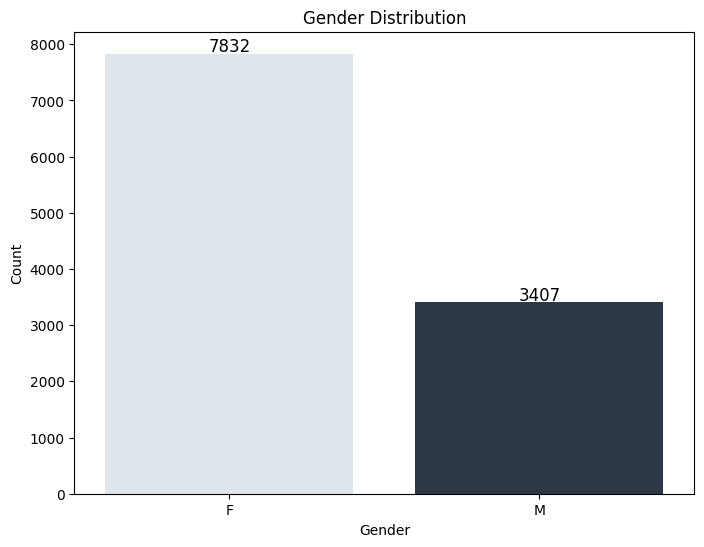

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical colors
colors = ['#DDE6ED', '#27374D']

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Gender', palette=colors)  # Use the palette parameter

# Add labels to the bars
for p in ax.patches:
    count = int(p.get_height())  # Convert height to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),     # 2. to not show .0 at the end
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


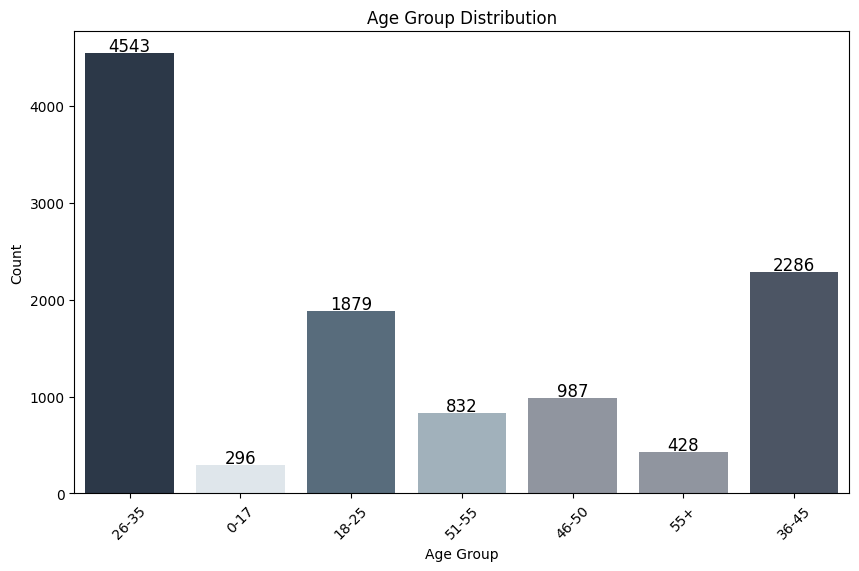

In [367]:
df = pd.read_csv('Diwali Sales Data.csv').sort_values(by = 'Amount', ascending =False)
colors = ["#27374D" , "#DDE6ED" , "#526D82" , "#9DB2BF" , "#8d94a2" , "#8d94a2" , "#485468" , "#b2b7c0" , "#d8dadf"]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', palette = colors )
# Add labels to the bars
for p in ax.patches:
    count = int(p.get_height())  # Convert height to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),     # 2. to not show .0 at the end
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


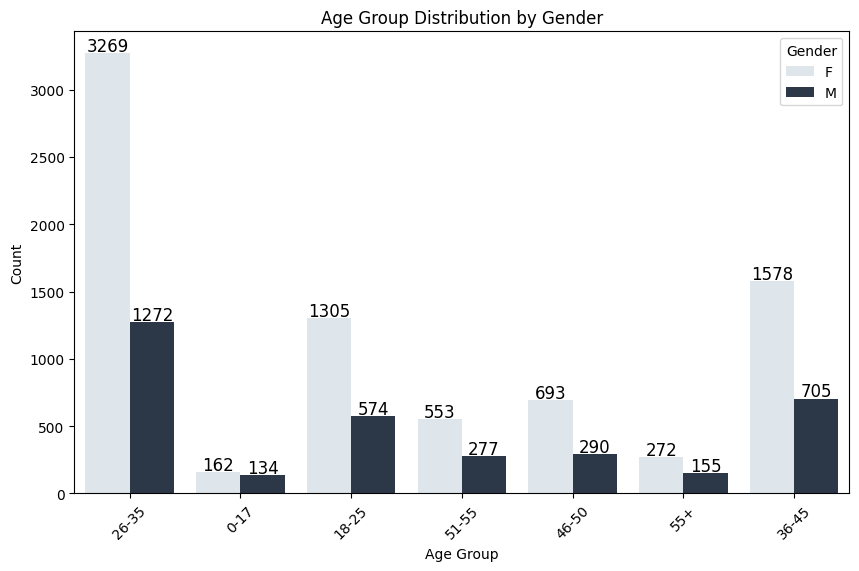

In [359]:
# Age and gender distribution
colors = ["#DDE6ED", "#27374D"]
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', palette=colors, hue='Gender')  # Add the hue parameter for gender differentiation

# Add labels to the bars
for p in ax.patches:
    count = int(p.get_height())  # Convert height to integer
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),     # 2. to not show .0 at the end
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Age Group Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Gender')  # Add legend for gender labels
plt.show()


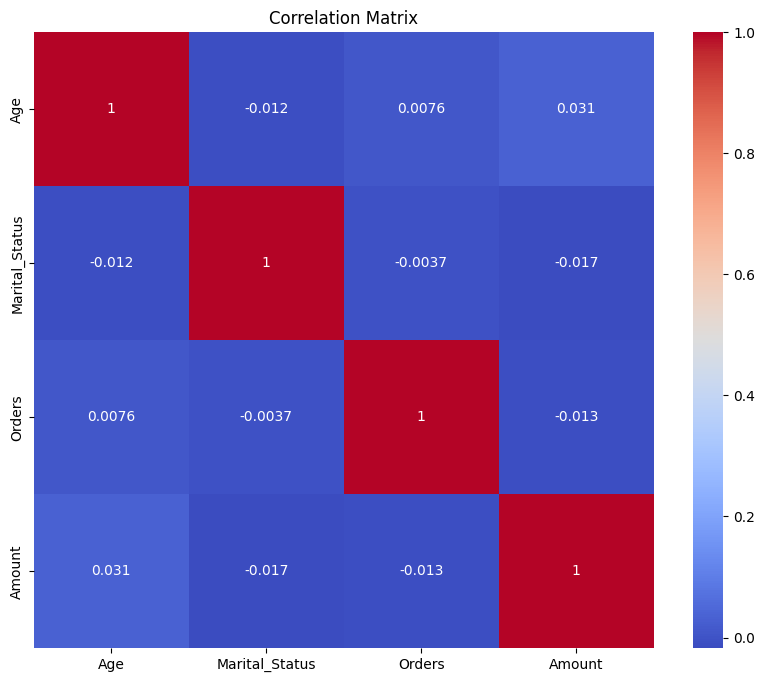

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Diwali Sales Data.csv')

# Drop non-numeric columns
numeric_df = df.drop(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category'], axis=1)

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [322]:
# Create a scatterplot chart with amount , aga-group and state

import pandas as pd

df = pd.read_csv('Diwali Sales Data.csv')

import plotly.express as px

fig = px.scatter(df, x='State', y='Product_Category', size='Marital_Status', color='Amount', size_max=35)

fig.update_layout(width=1300, height=800)
fig.show()

Insight

## Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [323]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [324]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,User_ID,Age,Marital_Status,Orders,Amount
0,1002903,28,0,1,23952.0
1,1000732,35,1,3,23934.0
2,1001990,35,1,3,23924.0
3,1001425,16,0,2,23912.0
4,1000588,28,1,2,23877.0


Now lets plot

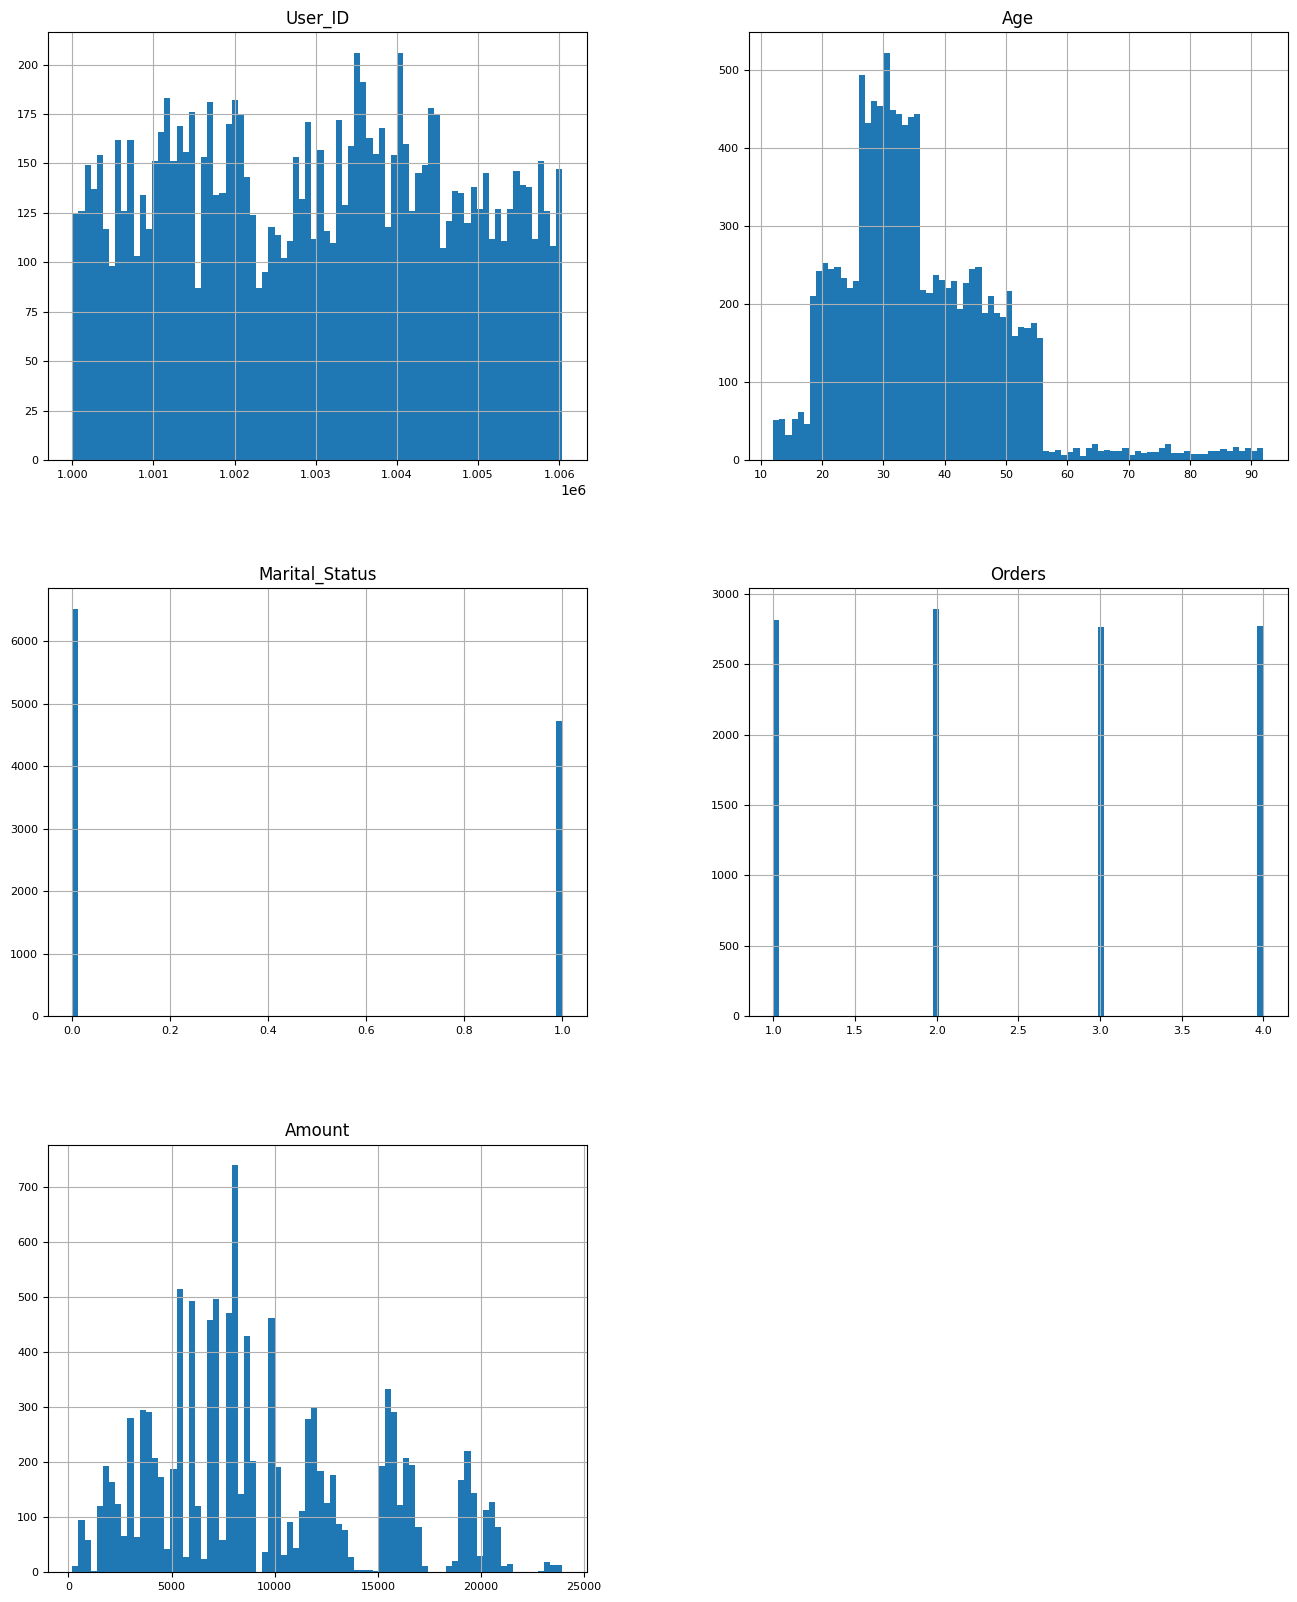

In [325]:
df_num.hist(figsize=(16, 20), bins=80, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Correlation

Now we'll try to find which features are strongly correlated with Amount . We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

In [326]:
df_num_corr = df_num.corr()['Amount'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.9].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with SalePrice:
Series([], Name: Amount, dtype: float64)


We can see that there are no correlations between the Amount and other variables

Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

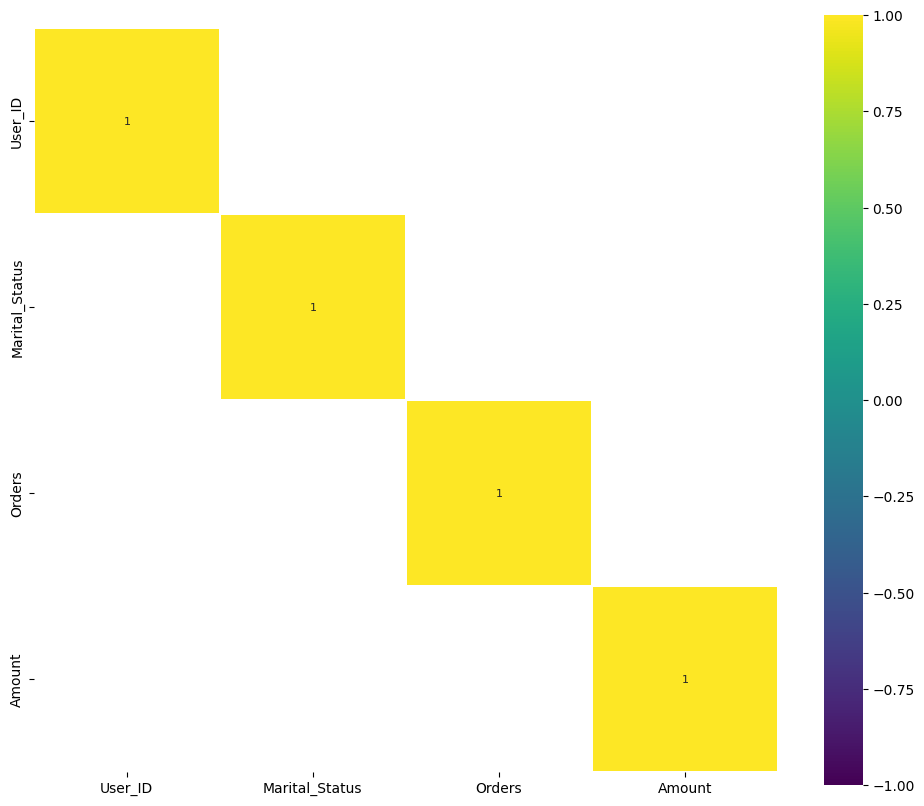

In [327]:
corr = df_num.drop('Age', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [328]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category,Amount
0,1002903,Sanskriti,P00125942,F,26-35,Maharashtra,Western,Healthcare,Auto,23952.0
1,1000732,Kartik,P00110942,F,26-35,Andhra Pradesh,Southern,Govt,Auto,23934.0
2,1001990,Bindu,P00118542,F,26-35,Uttar Pradesh,Central,Automobile,Auto,23924.0
3,1001425,Sudevi,P00237842,M,0-17,Karnataka,Southern,Construction,Auto,23912.0
4,1000588,Joni,P00057942,M,26-35,Gujarat,Western,Food Processing,Auto,23877.0


In [329]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 8 non numerical features including:
['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone', 'Occupation', 'Product_Category']


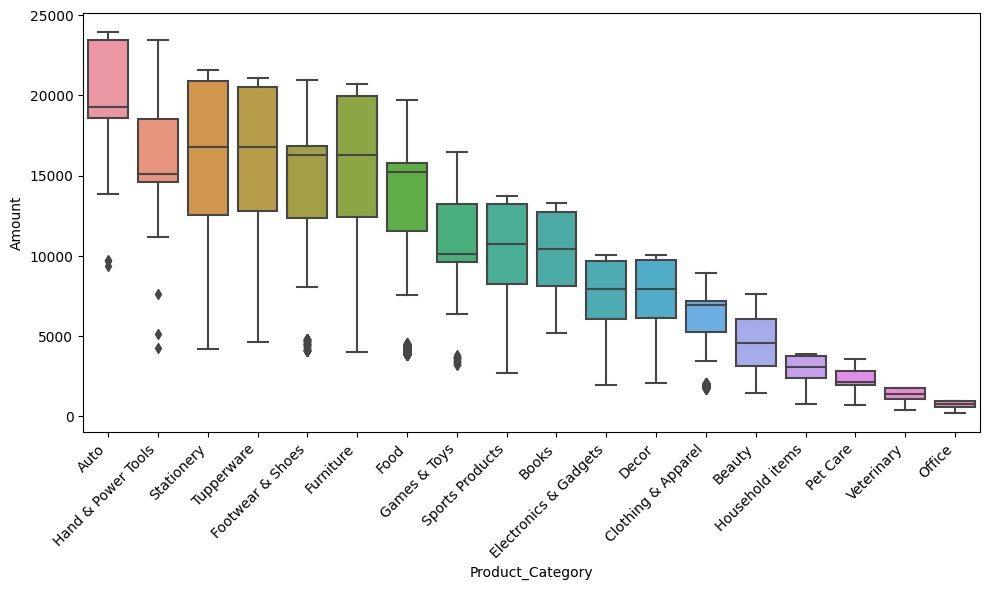

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Product_Category', y='Amount', data=df_categ)
plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor="k")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


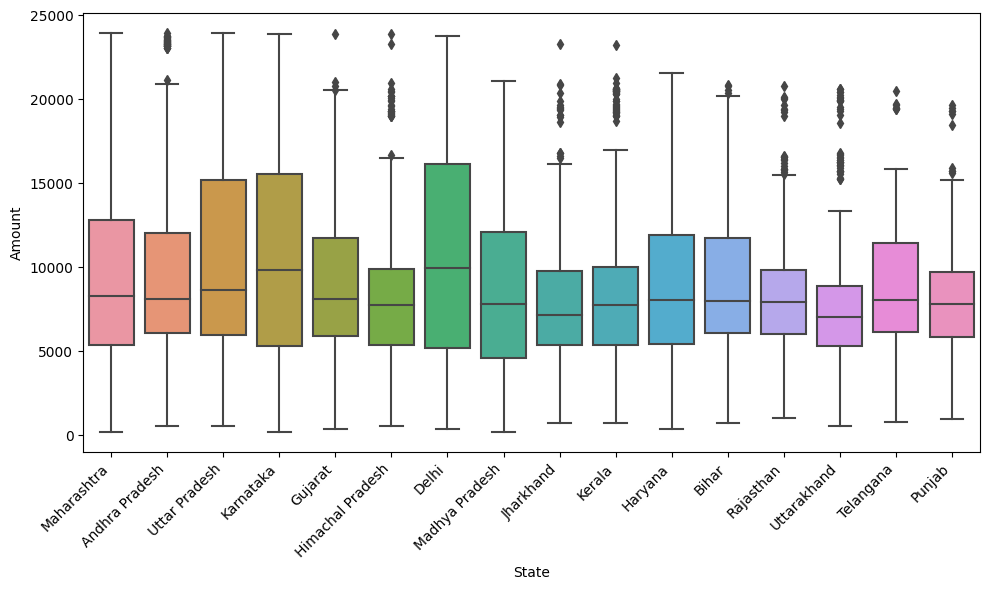

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='State', y='Amount', data=df_categ)
plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor="k")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


Max sales by States

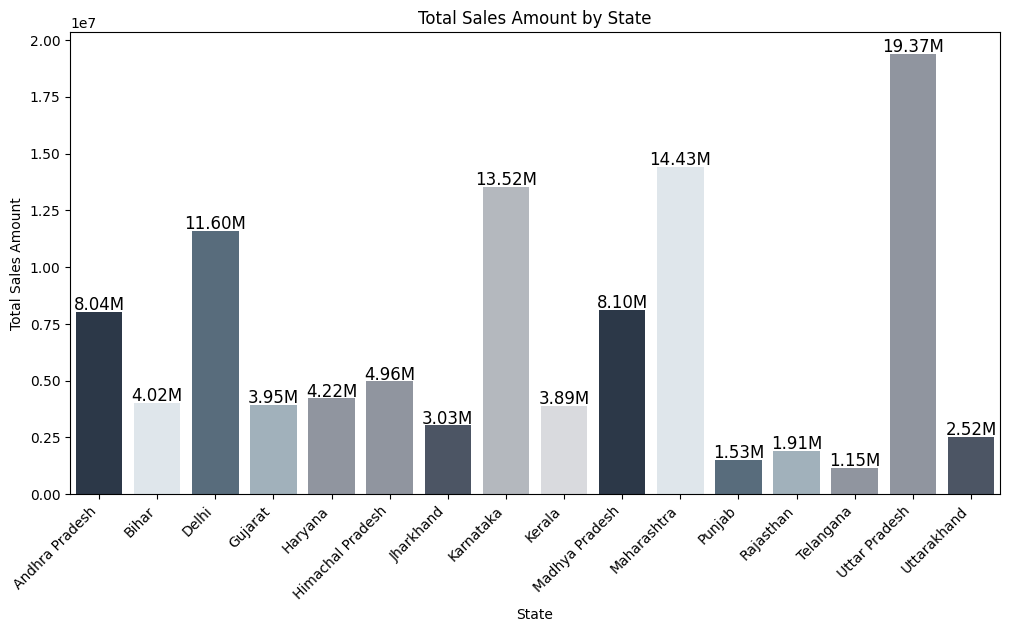

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#27374D" , "#DDE6ED" , "#526D82" , "#9DB2BF" , "#8d94a2" , "#8d94a2" , "#485468" , "#b2b7c0" , "#d8dadf"]
# Calculate the total sales amount for each state
state_sales = df.groupby('State')['Amount'].sum().reset_index()

# List of all states
all_states = df['State'].unique()

# Add missing states with zero sales
missing_states = [state for state in all_states if state not in state_sales['State'].values]
for state in missing_states:
    state_sales = state_sales.append({'State': state, 'Amount': 0}, ignore_index=True)

# Sort the data by state
state_sales = state_sales.sort_values(by='State')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=state_sales, x='State', y='Amount', palette=colors)

# Add labels to the bars
for p in ax.patches:
    sales_amount = p.get_height()
    ax.annotate(f'{sales_amount/1000000:.2f}M', 
                (p.get_x() + p.get_width()/ 2., p.get_height()),  
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Total Sales Amount by State")
plt.xlabel("State")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.show()


Max Orders by state

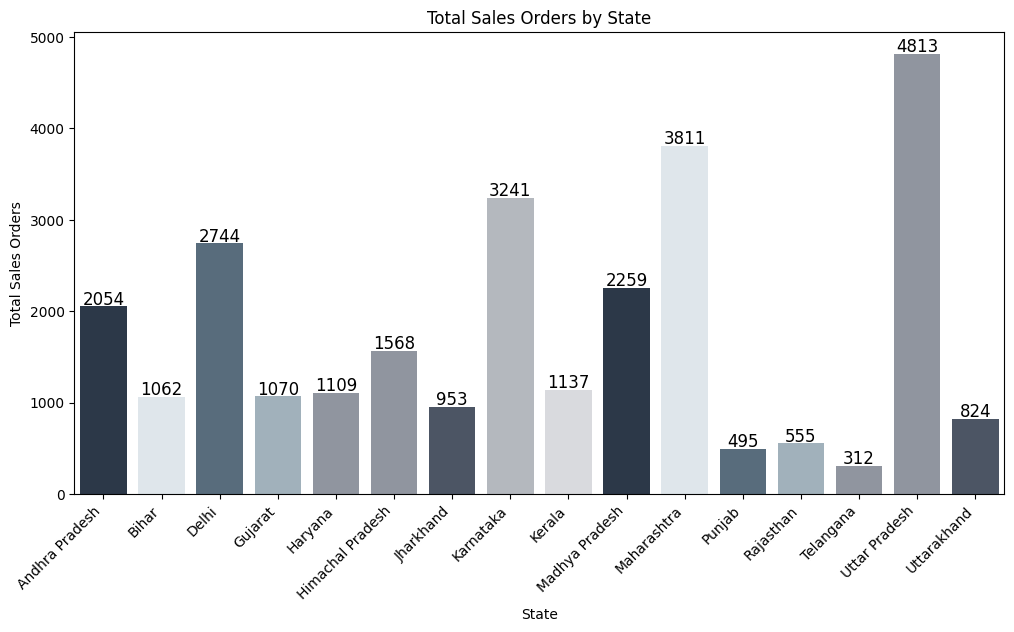

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#27374D" , "#DDE6ED" , "#526D82" , "#9DB2BF" , "#8d94a2" , "#8d94a2" , "#485468" , "#b2b7c0" , "#d8dadf"]
# Calculate the total sales amount for each state
state_sales = df.groupby('State')['Orders'].sum().reset_index()

# List of all states
all_states = df['State'].unique()

# Add missing states with zero sales
missing_states = [state for state in all_states if state not in state_sales['State'].values]
for state in missing_states:
    state_sales = state_sales.append({'State': state, 'Orders': 0}, ignore_index=True)

# Sort the data by state
state_sales = state_sales.sort_values(by='State')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=state_sales, x='State', y='Orders', palette=colors)

# Add labels to the bars
for p in ax.patches:
    sales_amount = p.get_height()
    ax.annotate(f'{sales_amount:.0f}', 
                (p.get_x() + p.get_width()/ 2., p.get_height()),  
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Total Sales Orders by State")
plt.xlabel("State")
plt.ylabel("Total Sales Orders")
plt.xticks(rotation=45, ha='right')
plt.show()


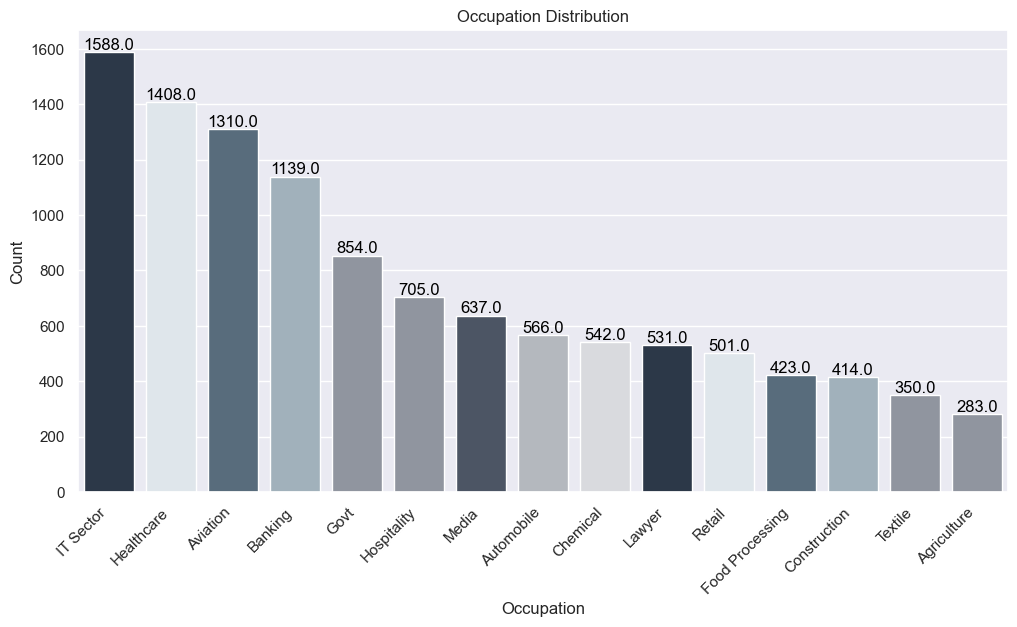

In [409]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#27374D" , "#DDE6ED" , "#526D82" , "#9DB2BF" , "#8d94a2" , "#8d94a2" , "#485468" , "#b2b7c0" , "#d8dadf"]
plt.figure(figsize=(12, 6))
occupation_counts = df['Occupation'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette=colors)

# Add labels to the bars
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Occupation Distribution")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


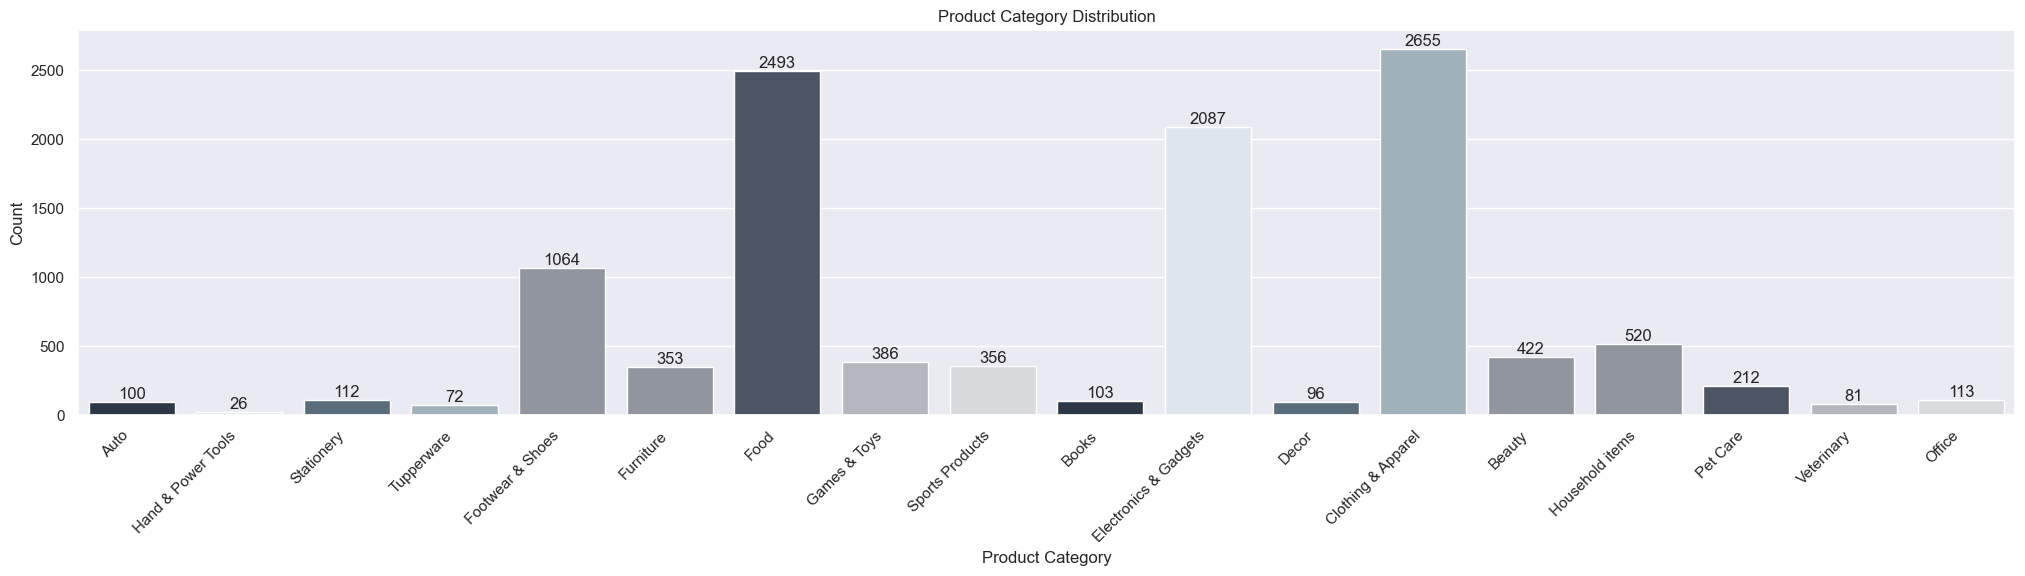

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#27374D" , "#DDE6ED" , "#526D82" , "#9DB2BF" , "#8d94a2" , "#8d94a2" , "#485468" , "#b2b7c0" , "#d8dadf"]
# Set the figure size
sns.set(rc={'figure.figsize': (25, 5)})

# Create the countplot with ascending order
ax = sns.countplot(data=df, x='Product_Category' , palette=colors)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set title and labels
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


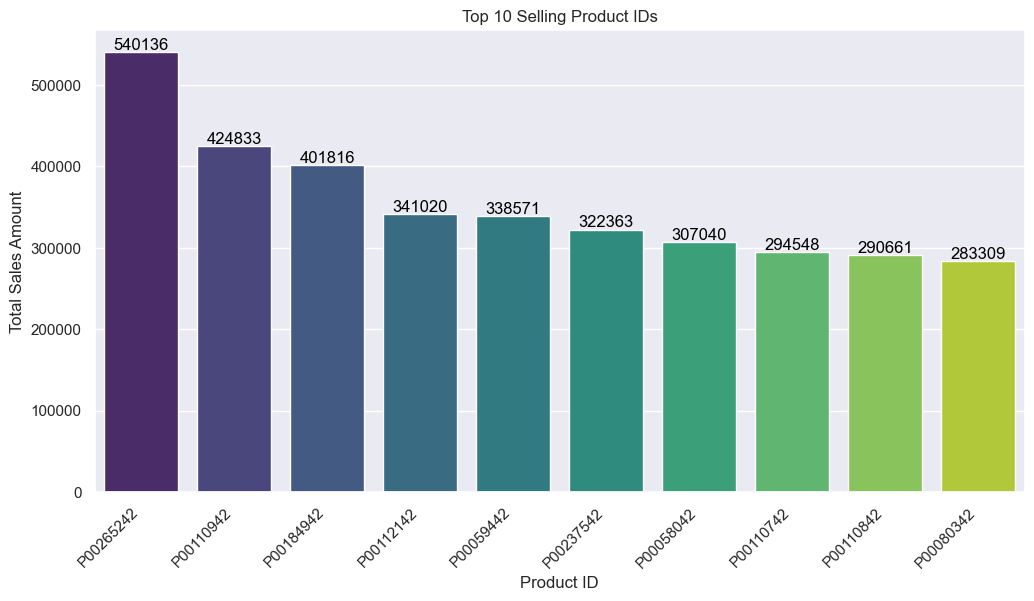

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total sales amount for each product ID
product_sales = df.groupby('Product_ID')['Amount'].sum().reset_index()

# Sort the data by sales amount in descending order and select the top 10
top_10_products = product_sales.sort_values(by='Amount', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(data=top_10_products, x='Product_ID', y='Amount', palette='viridis')

# Add labels to the bars
for p in ax.patches:
    sales_amount = p.get_height()
    ax.annotate(f'{sales_amount:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', 
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set title and labels
plt.title("Top 10 Selling Product IDs")
plt.xlabel("Product ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [420]:
# Filter the dataframe for the top selling product ID
top_product_info = df[df['Product_ID'] == 'P00265242']

# Print the information for the top selling product
print(top_product_info)


       User_ID   Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
62     1001687       Bruce  P00265242      F     26-35   33               0   
208    1004161      Murray  P00265242      F     46-50   50               1   
349    1003934         Ann  P00265242      F     26-35   32               0   
591    1003218       Craig  P00265242      F       55+   63               0   
812    1004916      Jeremy  P00265242      F     18-25   20               1   
963    1003292      Dipali  P00265242      M     51-55   53               1   
1309   1001599     Akshata  P00265242      F     26-35   35               0   
1347   1004220      Hughes  P00265242      F     36-45   38               0   
1561   1001434      Steven  P00265242      F      0-17   12               0   
1630   1000965      Cortes  P00265242      F       55+   81               1   
1796   1005083       Laura  P00265242      F     26-35   30               1   
1864   1000509       Rohan  P00265242      F     26-